In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
metadata = pd.read_csv("metadata.csv", sep=";")
metadata

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,NaN,no
1,Application mode,Feature,Integer,NaN,1 - 1st phase - general contingent 2 - Ordinan...,NaN,no
2,Application order,Feature,Integer,NaN,Application order (between 0 - first choice; a...,NaN,no
3,Course,Feature,Integer,NaN,33 - Biofuel Production Technologies 171 - Ani...,NaN,no
4,Daytime/evening attendance,Feature,Integer,NaN,1 – daytime 0 - evening,NaN,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,NaN,no
6,Previous qualification (grade),Feature,Continuous,NaN,Grade of previous qualification (between 0 and...,NaN,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,NaN,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no


In [3]:
def wrangle(filename):
    df = pd.read_csv(filename, sep=";")
    drop_cols = []

    # drop_cols.extend(df.columns[df.columns.str.contains("2nd")])

    # drop_cols.extend(["Nacionality"])

    df.drop(columns=drop_cols, inplace=True)

    ordinal_columns = [
        # "Curricular units 2nd sem (approved)",
        "Application order",
        "Age at enrollment",
    ]

    int_col = df.select_dtypes("int64")

    ordinal_columns.extend(int_col.columns[int_col.columns.str.contains("1st|2nd")])

    cat_columns = df.select_dtypes("int64").columns
    cat_columns = cat_columns.drop(labels=ordinal_columns)
    df[cat_columns] = df[cat_columns].astype("category")

    return df

In [4]:
df = wrangle("train.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [118]:
df.select_dtypes("category").columns

Index([], dtype='object')

In [42]:
df.notnull().product().sort_values(ascending=True).head()

Marital status                            1
Curricular units 1st sem (credited)       1
Curricular units 1st sem (enrolled)       1
Curricular units 1st sem (evaluations)    1
Curricular units 1st sem (approved)       1
dtype: int32

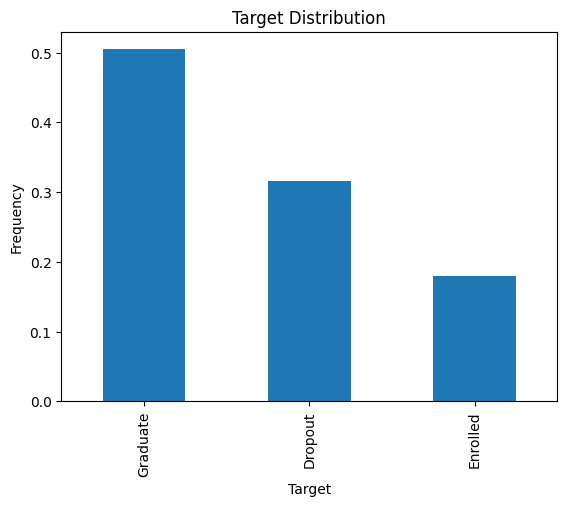

In [43]:
df['Target'].value_counts(normalize=True).plot(kind='bar')
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Frequency");

In [64]:
# Index columns
col = df.columns.str.contains('Curricular units')
df.columns[col]

Index(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

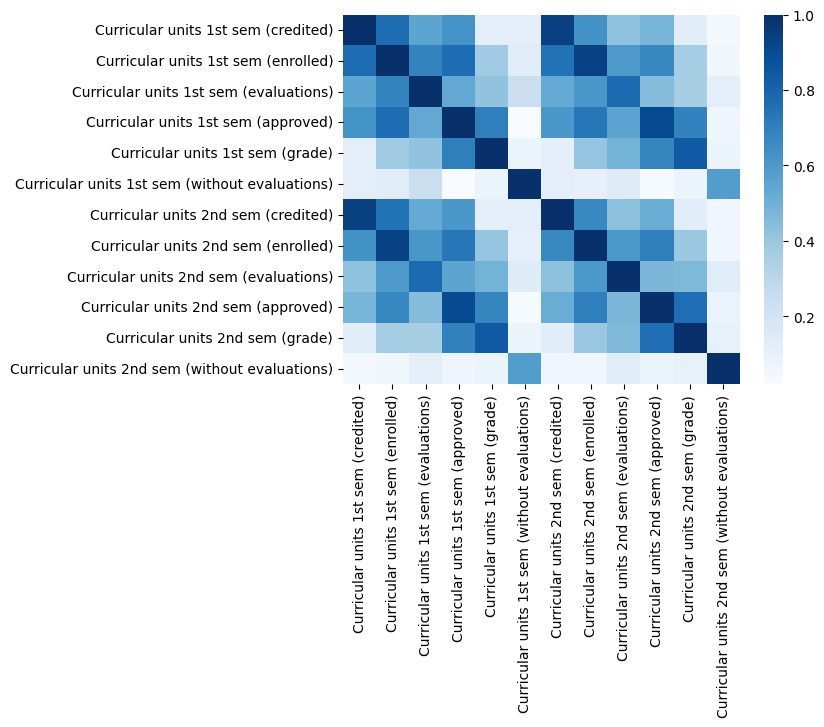

In [65]:
corr = df[df.columns[col]].corr()
sns.heatmap(corr.abs(), cmap="Blues");

Curricular units 1st sem (without evaluations)    7.844514
Curricular units 2nd sem (without evaluations)    7.023318
Curricular units 2nd sem (credited)               4.711805
Curricular units 1st sem (credited)               4.151924
Curricular units 1st sem (grade)                  1.552643
Curricular units 1st sem (enrolled)               1.534304
Curricular units 2nd sem (grade)                  1.309573
Curricular units 1st sem (evaluations)            1.056167
Curricular units 1st sem (approved)               0.703544
Curricular units 2nd sem (enrolled)               0.688892
Curricular units 2nd sem (evaluations)            0.281063
Curricular units 2nd sem (approved)               0.273465
dtype: float64


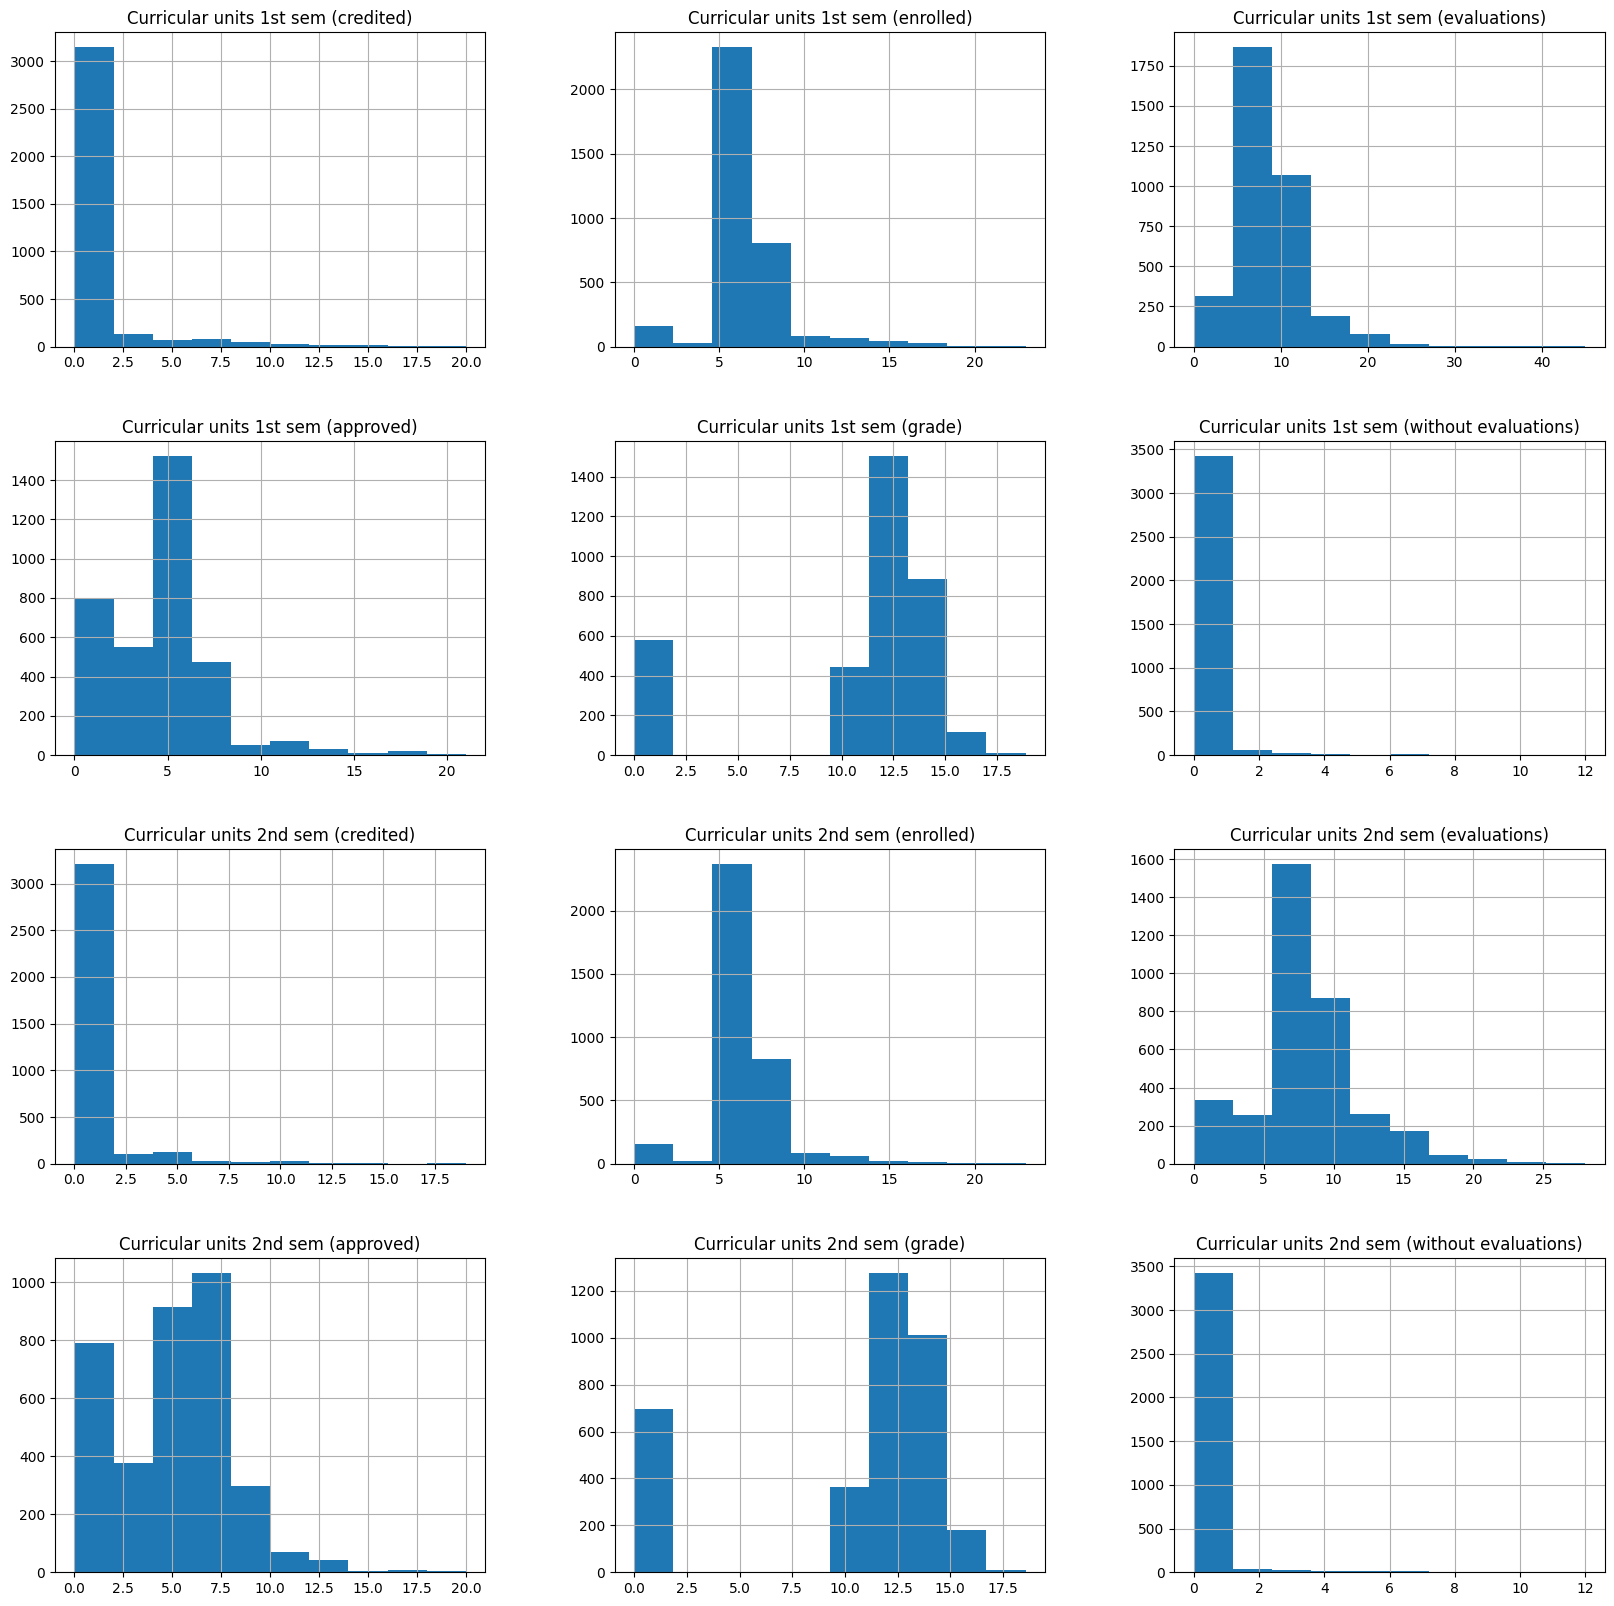

In [66]:
skewness = df[df.columns[col]].skew().abs().sort_values(ascending=False)
print(skewness)
df[df.columns[col]].hist(figsize=(20, 20));

In [67]:
col = df.columns.str.contains('Curricular units')
df[df.columns[col]].corr()

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
Curricular units 1st sem (credited),1.000000,0.768276,0.548641,0.625127,0.122443,0.119313,0.940278,0.631519,0.425662,0.481513,0.130600,0.045303
Curricular units 1st sem (enrolled),0.768276,1.000000,0.686577,0.768977,0.381894,0.131876,0.747358,0.938448,0.601403,0.671158,0.364974,0.060719
Curricular units 1st sem (evaluations),0.548641,0.686577,1.000000,0.534009,0.418090,0.245612,0.529024,0.612346,0.776066,0.447480,0.357352,0.118650
Curricular units 1st sem (approved),0.625127,0.768977,0.534009,1.000000,0.702371,-0.019940,0.606303,0.731289,0.549561,0.904171,0.691410,-0.068422
Curricular units 1st sem (grade),0.122443,0.381894,0.418090,0.702371,1.000000,-0.080196,0.113926,0.410715,0.490747,0.680108,0.841409,-0.076470
Curricular units 1st sem (without evaluations),0.119313,0.131876,0.245612,-0.019940,-0.080196,1.000000,0.116336,0.104153,0.138096,-0.029598,-0.078075,0.583086
Curricular units 2nd sem (credited),0.940278,0.747358,0.529024,0.606303,0.113926,0.116336,1.000000,0.668129,0.431204,0.515286,0.128023,0.056989
Curricular units 2nd sem (enrolled),0.631519,0.938448,0.612346,0.731289,0.410715,0.104153,0.668129,1.000000,0.605304,0.702472,0.398239,0.054978
Curricular units 2nd sem (evaluations),0.425662,0.601403,0.776066,0.549561,0.490747,0.138096,0.431204,0.605304,1.000000,0.469864,0.460868,0.131620
Curricular units 2nd sem (approved),0.481513,0.671158,0.447480,0.904171,0.680108,-0.029598,0.515286,0.702472,0.469864,1.000000,0.764577,-0.083911


C:\Users\Ahmed Dawoud\AppData\Local\Temp\ipykernel_7892\3941238487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_corr = df.corr()


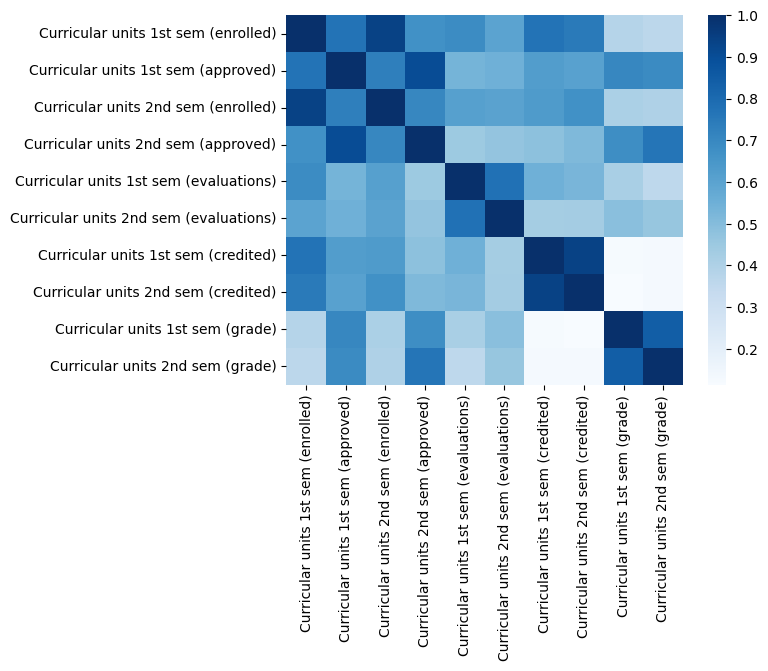

In [68]:
all_corr = df.corr()
corr = df[all_corr.mean().sort_values(ascending=False).head(10).index].corr()
sns.heatmap(corr.abs(), cmap="Blues");

In [74]:
fam_cols = df.columns.str.contains('Father|Mother')
skewness = df[df.columns[fam_cols]].skew().abs().sort_values(ascending=False)
print(skewness)
# df[df.columns[fam_cols]].hist();

Series([], dtype: float64)


C:\Users\Ahmed Dawoud\AppData\Local\Temp\ipykernel_7892\1649706945.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df[df.columns[fam_cols]].skew().abs().sort_values(ascending=False)


C:\Users\Ahmed Dawoud\AppData\Local\Temp\ipykernel_7892\3941238487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_corr = df.corr()


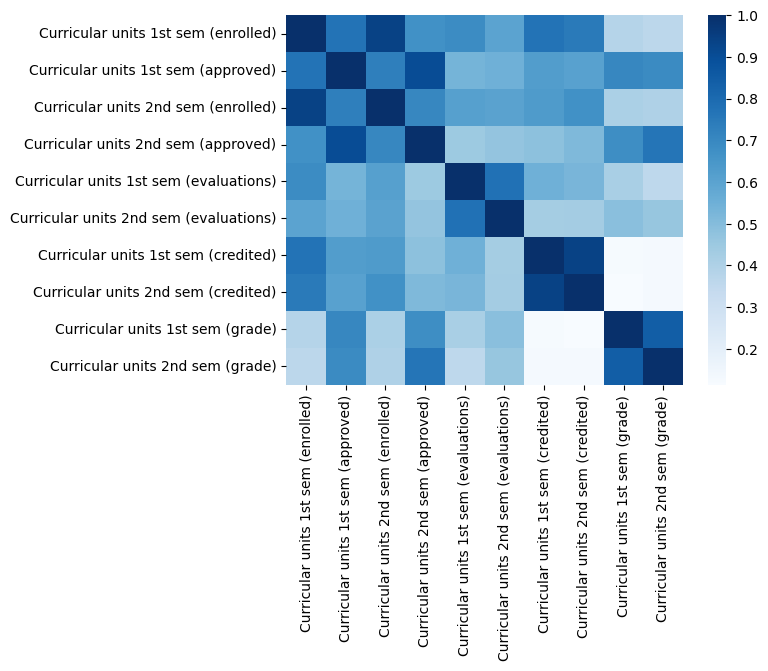

In [75]:
all_corr = df.corr()
corr = df[all_corr.mean().sort_values(ascending=False).head(10).index].corr()
sns.heatmap(corr.abs(), cmap="Blues");

In [146]:
df.shape

(3540, 21)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [10]:
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
acc_baseline = y_train.value_counts(normalize=True).max()
f"{acc_baseline=}"

'acc_baseline=0.5042372881355932'

In [84]:
linear_model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'), LogisticRegression(max_iter=2500, random_state=42)
)
linear_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression',
                 LogisticRegression(max_iter=2500, random_state=42))])

In [85]:
linear_model_train_acc = accuracy_score(y_train, linear_model.predict(X_train))
linear_model_test_acc = accuracy_score(y_test, linear_model.predict(X_test))
f"{linear_model_train_acc=}, {linear_model_test_acc=}"

'linear_model_train_acc=0.9311440677966102, linear_model_test_acc=0.7598870056497176'

In [86]:
tree_base_model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), DecisionTreeClassifier()
)
tree_base_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [87]:
tree_base_train_acc = accuracy_score(y_train, tree_base_model.predict(X_train))
tree_base_test_acc = accuracy_score(y_test, tree_base_model.predict(X_test))
f"{tree_base_train_acc=}, {tree_base_test_acc=}"

'tree_base_train_acc=1.0, tree_base_test_acc=0.7048022598870056'

In [88]:
depth_hyper = range(1, 25)
train_accs = []
test_accs = []
for d in depth_hyper:
    tree_model = make_pipeline(
        OneHotEncoder(handle_unknown='ignore'), DecisionTreeClassifier(random_state=42, max_depth=d)
    )
    tree_model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, tree_model.predict(X_train))
    test_acc = accuracy_score(y_test, tree_model.predict(X_test))
    print(f"Trained {d=}, {train_acc=}, {test_acc=}")
    train_accs.append(train_acc)
    test_accs.append(test_acc)

Trained d=1, train_acc=0.6475988700564972, test_acc=0.6624293785310734
Trained d=2, train_acc=0.6864406779661016, test_acc=0.7048022598870056


Trained d=3, train_acc=0.7097457627118644, test_acc=0.7330508474576272
Trained d=4, train_acc=0.7369350282485876, test_acc=0.7344632768361582
Trained d=5, train_acc=0.7658898305084746, test_acc=0.7471751412429378
Trained d=6, train_acc=0.7793079096045198, test_acc=0.7443502824858758
Trained d=7, train_acc=0.7962570621468926, test_acc=0.730225988700565
Trained d=8, train_acc=0.8163841807909604, test_acc=0.7358757062146892
Trained d=9, train_acc=0.8305084745762712, test_acc=0.748587570621469
Trained d=10, train_acc=0.8495762711864406, test_acc=0.7457627118644068
Trained d=11, train_acc=0.8647598870056498, test_acc=0.75
Trained d=12, train_acc=0.8817090395480226, test_acc=0.7612994350282486
Trained d=13, train_acc=0.899364406779661, test_acc=0.75
Trained d=14, train_acc=0.9138418079096046, test_acc=0.7443502824858758
Trained d=15, train_acc=0.9254943502824858, test_acc=0.7387005649717514
Trained d=16, train_acc=0.9357344632768362, test_acc=0.7387005649717514
Trained d=17, train_acc=0.9427

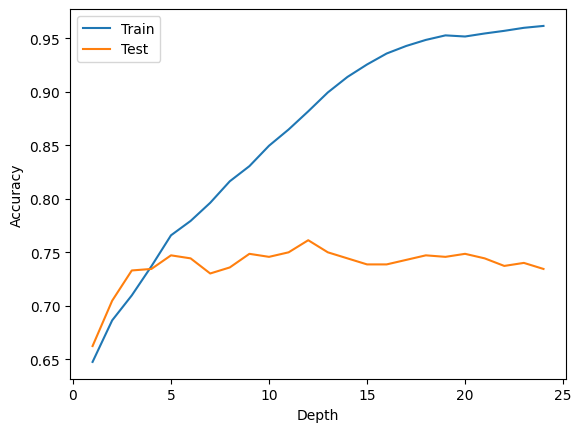

In [89]:
plt.plot(depth_hyper, train_accs, label="Train")
plt.plot(depth_hyper, test_accs, label="Test")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Accuracy");

In [90]:
tree_model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'), DecisionTreeClassifier(random_state=42, max_depth=12)
)
tree_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=12, random_state=42))])

In [91]:
linear_model_val_acc = accuracy_score(y_test, linear_model.predict(X_test))
tree_model_test_acc = accuracy_score(y_test, tree_model.predict(X_test))
f"{linear_model_val_acc=}, {tree_model_test_acc=}"

'linear_model_val_acc=0.7598870056497176, tree_model_test_acc=0.7612994350282486'

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
random_forest_model = RandomForestClassifier(random_state=42)

In [12]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
f"{random_forest_model.score(X_train, y_train)=}, {random_forest_model.score(X_test, y_test)=}"

'random_forest_model.score(X_train, y_train)=1.0, random_forest_model.score(X_test, y_test)=0.7669491525423728'

In [32]:
parameters = {
    "n_estimators": range(100, 400, 10),
    "max_depth": range(10, 40, 2),
}
rfc_model = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)
rfc_grid = GridSearchCV(rfc_model, parameters, verbose=100, n_jobs=-1, cv=3)
rfc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    1.0s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 40, 2),
                         'n_estimators': range(100, 400, 10)},
             verbose=100)

In [34]:
f"{rfc_grid.best_score_=}, {rfc_grid.best_params_=}"

"rfc_grid.best_score_=0.778954802259887, rfc_grid.best_params_={'max_depth': 16, 'n_estimators': 350}"

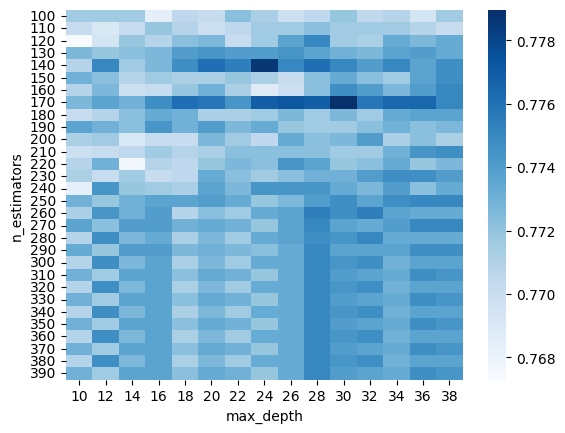

In [44]:
# Make a 2d grid with results heat map using sns
scores = rfc_grid.cv_results_["mean_test_score"].reshape(
    len(parameters["n_estimators"]), len(parameters["max_depth"])
)
sns.heatmap(
    scores,
    cmap="Blues",
    xticklabels=parameters["max_depth"],
    yticklabels=parameters["n_estimators"],
)
plt.xlabel("max_depth")
plt.ylabel("n_estimators");

In [70]:
from lazypredict.Supervised import LazyClassifier

In [71]:
clf = LazyClassifier(verbose=5, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:11,  2.52it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7443502824858758, 'Balanced Accuracy': 0.6541716546953977, 'ROC AUC': None, 'F1 Score': 0.7325010317730506, 'Time taken': 0.39614272117614746}


  7%|▋         | 2/29 [00:00<00:07,  3.40it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.7033898305084746, 'Balanced Accuracy': 0.6122971534982709, 'ROC AUC': None, 'F1 Score': 0.6924144903233256, 'Time taken': 0.22120380401611328}
{'Model': 'BernoulliNB', 'Accuracy': 0.7146892655367232, 'Balanced Accuracy': 0.6077451154266796, 'ROC AUC': None, 'F1 Score': 0.693913361402336, 'Time taken': 0.03284883499145508}


 28%|██▊       | 8/29 [00:02<00:05,  3.55it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7429378531073446, 'Balanced Accuracy': 0.6199796414531051, 'ROC AUC': None, 'F1 Score': 0.7085127396898316, 'Time taken': 1.977168321609497}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6836158192090396, 'Balanced Accuracy': 0.6147348216133132, 'ROC AUC': None, 'F1 Score': 0.6804298454891461, 'Time taken': 0.04916238784790039}
{'Model': 'DummyClassifier', 'Accuracy': 0.5056497175141242, 'Balanced Accuracy': 0.3333333333333333, 'ROC AUC': None, 'F1 Score': 0.33962964140723545, 'Time taken': 0.018059730529785156}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.632768361581921, 'Balanced Accuracy': 0.5552026987082853, 'ROC AUC': None, 'F1 Score': 0.6342288721826094, 'Time taken': 0.02732563018798828}


 34%|███▍      | 10/29 [00:03<00:05,  3.50it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.730225988700565, 'Balanced Accuracy': 0.6282736247820047, 'ROC AUC': None, 'F1 Score': 0.7122377880603206, 'Time taken': 0.5688812732696533}
{'Model': 'GaussianNB', 'Accuracy': 0.7062146892655368, 'Balanced Accuracy': 0.6378644955809761, 'ROC AUC': None, 'F1 Score': 0.7026299263036819, 'Time taken': 0.02106928825378418}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.6963276836158192, 'Balanced Accuracy': 0.5962846575625905, 'ROC AUC': None, 'F1 Score': 0.6804312566188235, 'Time taken': 0.08539772033691406}


 41%|████▏     | 12/29 [00:03<00:04,  3.52it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.6581920903954802, 'Balanced Accuracy': 0.5764184475776655, 'ROC AUC': None, 'F1 Score': 0.6517653830300081, 'Time taken': 0.4685492515563965}


 45%|████▍     | 13/29 [00:04<00:05,  2.72it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.6596045197740112, 'Balanced Accuracy': 0.5773495462741273, 'ROC AUC': None, 'F1 Score': 0.6528386812153989, 'Time taken': 0.7414505481719971}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.731638418079096, 'Balanced Accuracy': 0.6265065694185806, 'ROC AUC': None, 'F1 Score': 0.7128677078954627, 'Time taken': 0.04916238784790039}


 52%|█████▏    | 15/29 [00:05<00:04,  2.89it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.7372881355932204, 'Balanced Accuracy': 0.6088406343294611, 'ROC AUC': None, 'F1 Score': 0.6978548571457346, 'Time taken': 0.5618584156036377}
{'Model': 'LogisticRegression', 'Accuracy': 0.7457627118644068, 'Balanced Accuracy': 0.6349132452484407, 'ROC AUC': None, 'F1 Score': 0.7215437035835713, 'Time taken': 0.07924485206604004}
{'Model': 'NearestCentroid', 'Accuracy': 0.6779661016949152, 'Balanced Accuracy': 0.6569594085306375, 'ROC AUC': None, 'F1 Score': 0.693954201798863, 'Time taken': 0.01906299591064453}


 72%|███████▏  | 21/29 [00:06<00:01,  4.79it/s]

{'Model': 'NuSVC', 'Accuracy': 0.7372881355932204, 'Balanced Accuracy': 0.6152714965564128, 'ROC AUC': None, 'F1 Score': 0.705607647519868, 'Time taken': 0.7046663761138916}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.672316384180791, 'Balanced Accuracy': 0.6050146315509445, 'ROC AUC': None, 'F1 Score': 0.6731590510357248, 'Time taken': 0.04113483428955078}
{'Model': 'Perceptron', 'Accuracy': 0.6963276836158192, 'Balanced Accuracy': 0.57596490644675, 'ROC AUC': None, 'F1 Score': 0.657367112083624, 'Time taken': 0.03009939193725586}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.7033898305084746, 'Balanced Accuracy': 0.6183012621560108, 'ROC AUC': None, 'F1 Score': 0.6949487430752327, 'Time taken': 0.036328792572021484}


 86%|████████▌ | 25/29 [00:07<00:00,  4.99it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7401129943502824, 'Balanced Accuracy': 0.6358618944163636, 'ROC AUC': None, 'F1 Score': 0.7198211963075031, 'Time taken': 0.7414517402648926}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7358757062146892, 'Balanced Accuracy': 0.5931237252815466, 'ROC AUC': None, 'F1 Score': 0.6836933787382442, 'Time taken': 0.03200030326843262}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7358757062146892, 'Balanced Accuracy': 0.5931237252815466, 'ROC AUC': None, 'F1 Score': 0.6836933787382442, 'Time taken': 0.03411388397216797}
{'Model': 'SGDClassifier', 'Accuracy': 0.7189265536723164, 'Balanced Accuracy': 0.605568856965505, 'ROC AUC': None, 'F1 Score': 0.6939478751569518, 'Time taken': 0.06923198699951172}


 93%|█████████▎| 27/29 [00:07<00:00,  4.71it/s]

{'Model': 'SVC', 'Accuracy': 0.7401129943502824, 'Balanced Accuracy': 0.634834729981378, 'ROC AUC': None, 'F1 Score': 0.7209215562871549, 'Time taken': 0.48259568214416504}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 2832, number of used features: 19
[LightGBM] [Info] Start training from score -1.155272
[LightGBM] [Info] Start training from score -1.710414
[LightGBM] [Info] Start training from score -0.684708


100%|██████████| 29/29 [00:08<00:00,  3.47it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.7245762711864406, 'Balanced Accuracy': 0.6216774186397092, 'ROC AUC': None, 'F1 Score': 0.70763816707079, 'Time taken': 0.8344767093658447}


In [72]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.68,0.66,None,0.69,0.02
AdaBoostClassifier,0.74,0.65,None,0.73,0.40
GaussianNB,0.71,0.64,None,0.70,0.02
RandomForestClassifier,0.74,0.64,None,0.72,0.74
LogisticRegression,0.75,0.63,None,0.72,0.08
SVC,0.74,0.63,None,0.72,0.48
ExtraTreesClassifier,0.73,0.63,None,0.71,0.57
LinearDiscriminantAnalysis,0.73,0.63,None,0.71,0.05
LGBMClassifier,0.72,0.62,None,0.71,0.83


In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
ada_base_model = AdaBoostClassifier(random_state=42, n_estimators=50)
ada_base_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [99]:
ada_train_acc = accuracy_score(y_train, ada_base_model.predict(X_train))
ada_val_acc = accuracy_score(y_test, ada_base_model.predict(X_test))
f"{ada_train_acc=}, {ada_val_acc=}"

'ada_train_acc=0.7715395480225988, ada_val_acc=0.7740112994350282'

In [101]:
parameters = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.1, 0.5, 1.0, 2.0],
    "algorithm": ['SAMME', 'SAMME.R']
}
ada_model = AdaBoostClassifier(random_state=42)
ada_grid = GridSearchCV(ada_model, parameters, verbose=10, n_jobs=-1, cv=3)
ada_grid.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=10)

In [103]:
f"{ada_grid.best_params_=}, {ada_grid.best_score_=}"

"ada_grid.best_params_={'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100}, ada_grid.best_score_=0.7620056497175142"

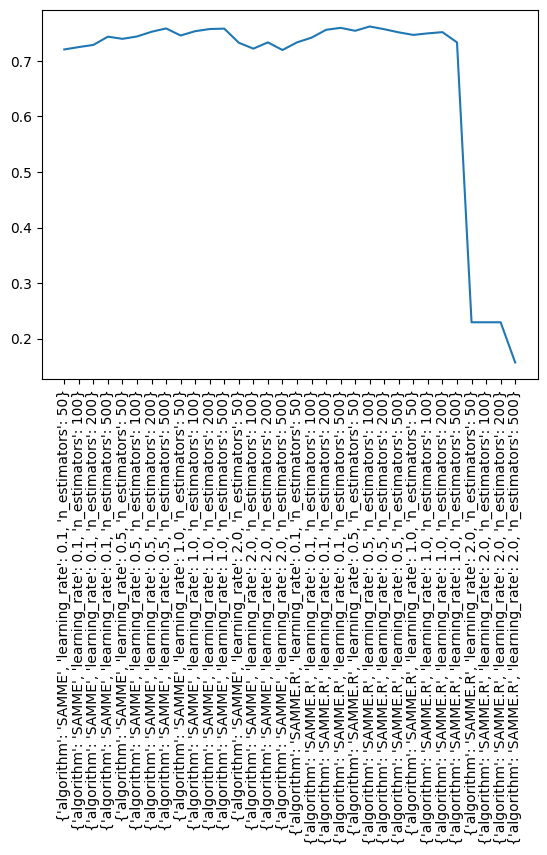

In [104]:
plt.plot(ada_grid.cv_results_['mean_test_score'])
plt.xticks(range(len(ada_grid.cv_results_['params'])), ada_grid.cv_results_['params'], rotation=90);

In [194]:
parameters = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.5, 0.7, 1.0],
}
ada_model = AdaBoostClassifier(random_state=42)
ada_grid = GridSearchCV(ada_model, parameters, cv = 3,verbose=10)
ada_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START learning_rate=0.5, n_estimators=50.........................
[CV 1/3; 1/12] END learning_rate=0.5, n_estimators=50;, score=0.758 total time=   0.8s
[CV 2/3; 1/12] START learning_rate=0.5, n_estimators=50.........................
[CV 2/3; 1/12] END learning_rate=0.5, n_estimators=50;, score=0.746 total time=   0.2s
[CV 3/3; 1/12] START learning_rate=0.5, n_estimators=50.........................
[CV 3/3; 1/12] END learning_rate=0.5, n_estimators=50;, score=0.763 total time=   0.2s
[CV 1/3; 2/12] START learning_rate=0.5, n_estimators=100........................
[CV 1/3; 2/12] END learning_rate=0.5, n_estimators=100;, score=0.761 total time=   0.6s
[CV 2/3; 2/12] START learning_rate=0.5, n_estimators=100........................
[CV 2/3; 2/12] END learning_rate=0.5, n_estimators=100;, score=0.748 total time=   0.6s
[CV 3/3; 2/12] START learning_rate=0.5, n_estimators=100........................
[CV 3/3; 2/12] E

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=10)

In [105]:
f"{ada_grid.best_params_=}, {ada_grid.best_score_=}"

"ada_grid.best_params_={'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 100}, ada_grid.best_score_=0.7620056497175142"

In [107]:
ada_model = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.5, algorithm='SAMME.R')

In [108]:
ada_model.fit(X_train, y_train)
f"{ada_model.score(X_train, y_train)=}, {ada_model.score(X_test, y_test)=}"

'ada_model.score(X_train, y_train)=0.7838983050847458, ada_model.score(X_test, y_test)=0.7669491525423728'

In [10]:
plt.plot(ada_grid.cv_results_['mean_test_score'])
plt.xticks(range(len(ada_grid.cv_results_['params'])), ada_grid.cv_results_['params'], rotation=90);

NameError: name 'ada_grid' is not defined

In [115]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

In [117]:
ada_model.score(X_train, y_train)

0.7838983050847458

In [118]:
ada_model.score(X_test, y_test)

0.7669491525423728

In [45]:
rfc_grid.best_estimator_.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    0.8s finished


RandomForestClassifier(max_depth=16, n_estimators=350, n_jobs=-1,
                       random_state=42, verbose=1)

In [46]:
rfc_grid.best_estimator_.score(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 350 out of 350 | elapsed:    0.0s finished


0.989406779661017

In [47]:
rfc_grid.best_estimator_.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 350 out of 350 | elapsed:    0.0s finished


0.769774011299435

In [89]:
# evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [95]:
yhat = rfc_grid.best_estimator_.predict(X_test);

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 350 out of 350 | elapsed:    0.1s finished


Accuracy: 76.98%
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       224
    Enrolled       0.54      0.32      0.40       126
    Graduate       0.79      0.94      0.86       358

    accuracy                           0.77       708
   macro avg       0.71      0.67      0.68       708
weighted avg       0.75      0.77      0.75       708



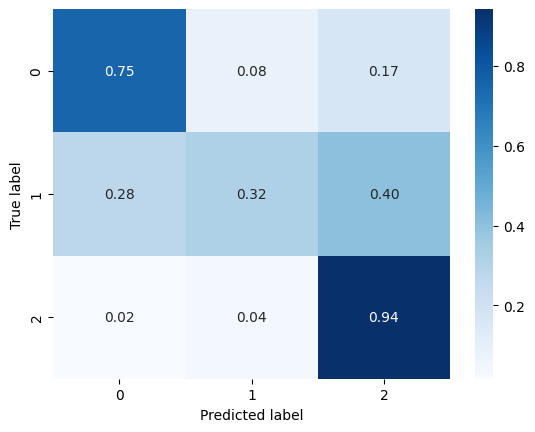

In [108]:
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
matrix = confusion_matrix(y_test, yhat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(matrix, annot=True, cmap="Blues", fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
report = classification_report(y_test, yhat)
print(report)

In [48]:
X_sub = wrangle("test.csv")
y_pred = rfc_grid.best_estimator_.predict(X_sub)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 350 out of 350 | elapsed:    0.0s finished


In [49]:
submission = pd.DataFrame({'TARGET': y_pred})
submission['ID'] = submission.index + 3540
submission = submission[['ID', 'TARGET']]
submission

,ID,TARGET
0,3540,Dropout
1,3541,Dropout
2,3542,Enrolled
3,3543,Dropout
4,3544,Dropout
...,...,...
879,4419,Graduate
880,4420,Dropout
881,4421,Graduate
882,4422,Graduate


In [50]:
submission.to_csv('submission_rfc_16_350.csv', index=False)